<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Algoritmo **Naive Bayes**

Naive Bayes es una **familia de clasificadores probabilísticos** basados
en el teorema de Bayes. Se llama *naive* ("ingenuo") porque asume que
todas las características (features) son **independientes entre sí**
dado el valor de la clase.

Aunque esta suposición rara vez es cierta en la práctica,
sorprendentemente el algoritmo funciona muy bien en muchos problemas
reales.

------------------------------------------------------------------------

## 🔹 Teorema de Bayes

El teorema de Bayes nos dice que:

\[ P(C\|X) = `\frac{P(X|C) \cdot P(C)}{P(X)}`{=tex} \]

Donde:

-   ( P(C\|X) ): Probabilidad posterior de la clase (C) dado el conjunto
    de características (X).
-   ( P(X\|C) ): Probabilidad de observar los datos (X) dado que la
    clase es (C).
-   ( P(C) ): Probabilidad a priori de la clase.
-   ( P(X) ): Probabilidad de observar los datos.

------------------------------------------------------------------------

## 🔹 Suposición "Naive"

Si tenemos un vector de características (X = (x_1, x_2, ..., x_n)),
Naive Bayes asume:

\[ P(X\|C) = `\prod`{=tex}\_{i=1}\^{n} P(x_i\|C) \]

Es decir, la probabilidad de las características conjuntas es el
**producto de las probabilidades individuales**.

Entonces:

\[ P(C\|X) `\propto `{=tex}P(C) `\prod`{=tex}\_{i=1}\^{n} P(x_i\|C) \]

El clasificador asigna a la instancia la clase con mayor probabilidad
posterior.

------------------------------------------------------------------------

## 🔹 Tipos de Naive Bayes

Dependiendo de cómo modelamos ( P(x_i\|C) ):

1.  **Multinomial Naive Bayes** → usado en clasificación de texto
    (frecuencia de palabras).\
2.  **Bernoulli Naive Bayes** → usado en datos binarios
    (presencia/ausencia de palabras).\
3.  **Gaussian Naive Bayes** → usado en datos continuos, asumiendo
    distribución normal.

------------------------------------------------------------------------

## ✅ Ventajas

-   **Simplicidad**: Muy fácil de implementar.\
-   **Velocidad**: Entrena y predice rápido, incluso en datasets
    grandes.\
-   **Eficiente con texto**: Funciona excelente en problemas de
    clasificación de documentos, spam, análisis de sentimientos.\
-   **Pocos datos necesarios**: Requiere menos datos de entrenamiento en
    comparación con otros algoritmos complejos.\
-   **No se sobreajusta fácilmente** con datos ruidosos.

------------------------------------------------------------------------

## ❌ Desventajas

-   **Suposición de independencia poco realista**: En muchos casos, las
    características están correlacionadas.\
-   **Manejo limitado de variables continuas**: Gaussian NB funciona
    solo si la distribución es aproximadamente normal.\
-   **Sensibilidad a datos no vistos**: Si una probabilidad condicional
    es cero, el producto total se vuelve cero (se suele usar suavizado
    de Laplace para evitarlo).\
-   **Menor precisión que modelos más avanzados** (como Random Forests,
    XGBoost, Redes Neuronales) en datasets complejos.

------------------------------------------------------------------------

## 🔹 Ejemplo intuitivo

### Ejemplo 1: Clasificación de spam

-   Palabra **"gratis"** aparece más en correos spam.\
-   Palabra **"reunión"** aparece más en correos legítimos.\
-   Dado un correo con las palabras "gratis" y "reunión", NB calcula
    probabilidades y predice la clase con mayor verosimilitud.

### Ejemplo 2: Diagnóstico médico simplificado

-   Queremos predecir si un paciente tiene gripe.\
-   Características: fiebre, tos, dolor de cabeza.\
-   NB calcula ( P(`\text{gripe}`{=tex}\|`\text{síntomas}`{=tex}) ) y (
    P(`\text{no gripe}`{=tex}\|`\text{síntomas}`{=tex}) ), luego elige
    la más probable.

------------------------------------------------------------------------

## 🔹 Recomendaciones de uso

👉 **Casos donde Naive Bayes funciona muy bien:** - Clasificación de
texto (spam, análisis de sentimientos, noticias).\
- Problemas donde las features son condicionalmente independientes.\
- Cuando se necesita un modelo base rápido y sencillo (baseline).

👉 **Casos donde evitarlo:** - Cuando las variables están altamente
correlacionadas.\
- Cuando las distribuciones de datos continuos no se asemejan a la
normal.\
- En datasets muy complejos donde algoritmos como SVM, Random Forests o
redes neuronales suelen superar su rendimiento.

------------------------------------------------------------------------

## 🔹 Mini ejemplo en Python

``` python
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Datos de ejemplo
X_texts = ["oferta gratis", "reunión mañana", "descuento especial", "trabajo importante"]
y = ["spam", "no_spam", "spam", "no_spam"]

# Convertir texto en vectores de frecuencias
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_texts)

# Entrenar Naive Bayes
clf = MultinomialNB()
clf.fit(X, y)

# Predicción
print(clf.predict(vectorizer.transform(["oferta especial mañana"])))
```

------------------------------------------------------------------------

👉 En resumen: **Naive Bayes es rápido, simple y sorprendentemente
efectivo en clasificación de texto, pero limitado en casos donde las
variables dependen mucho entre sí o los datos no cumplen sus
supuestos.**


In [1]:
# Un ejemplo simple de cómo usar el algoritmo Naive Bayes en Python

# 1. Importar las bibliotecas necesarias
# Importamos scikit-learn, una biblioteca muy popular para aprendizaje automático en Python.
# Usaremos el clasificador GaussianNB, adecuado para características con distribución Gaussiana.
from sklearn.naive_bayes import GaussianNB
# También necesitamos algunas herramientas para manejar datos y evaluar el modelo.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # Para manejar arrays numéricos

# 2. Preparar los datos de ejemplo
# Vamos a crear un conjunto de datos simple para clasificar.
# Imaginemos que queremos clasificar si una persona comprará un coche
# basándonos en su edad (aproximada) y su ingresos (aproximados).
# 'X' serán las características (edad, ingresos)
X = np.array([[20, 30000],
              [30, 50000],
              [40, 70000],
              [25, 35000],
              [35, 60000],
              [45, 80000],
              [22, 32000],
              [38, 65000],
              [48, 85000],
              [55, 90000]])
# 'y' será la variable objetivo (si comprará un coche: 0 para No, 1 para Sí)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
# Es una buena práctica dividir los datos para entrenar el modelo con una parte
# y probar su rendimiento con otra parte que el modelo no ha visto antes.
# Usaremos un 80% para entrenamiento y un 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Crear y entrenar el modelo Naive Bayes
# Creamos una instancia del clasificador Gaussian Naive Bayes.
model = GaussianNB()
# Entrenamos el modelo con los datos de entrenamiento.
model.fit(X_train, y_train)

# 5. Hacer predicciones
# Usamos el modelo entrenado para hacer predicciones sobre los datos de prueba.
predictions = model.predict(X_test)

# 6. Evaluar el modelo
# Comparamos las predicciones del modelo con los valores reales en el conjunto de prueba.
# La precisión (accuracy) es una métrica común para ver qué tan a menudo el modelo acierta.
accuracy = accuracy_score(y_test, predictions)

# 7. Mostrar los resultados
print("Datos de prueba (características):")
print(X_test)
print("\nValores reales (comprará coche):")
print(y_test)
print("\nPredicciones del modelo:")
print(predictions)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# 8. Ejemplo de predicción con nuevos datos
# Vamos a predecir si una persona de 28 años con ingresos de 40000 comprará un coche.
new_person = np.array([[28, 40000]])
prediction_new = model.predict(new_person)

print("\nPredicción para una nueva persona (28 años, 40000 ingresos):")
if prediction_new[0] == 1:
    print("El modelo predice: Sí comprará un coche")
else:
    print("El modelo predice: No comprará un coche")

Datos de prueba (características):
[[   48 85000]
 [   30 50000]]

Valores reales (comprará coche):
[1 0]

Predicciones del modelo:
[1 1]

Precisión del modelo: 0.50

Predicción para una nueva persona (28 años, 40000 ingresos):
El modelo predice: Sí comprará un coche


**Explicación del código:**

1.  **Importar bibliotecas:** Se importan las herramientas necesarias de `sklearn` (para el modelo Naive Bayes, división de datos y métricas de evaluación) y `numpy` (para manejar los datos numéricos).
2.  **Preparar datos:** Se crea un pequeño conjunto de datos de ejemplo (`X` para las características y `y` para la etiqueta objetivo). En este caso, clasificamos si alguien comprará un coche (1) o no (0) basándonos en su edad e ingresos.
3.  **Dividir datos:** Se divide el conjunto de datos en dos partes: una para entrenar el modelo (`X_train`, `y_train`) y otra para probar su rendimiento después de entrenar (`X_test`, `y_test`). Esto evita que el modelo "memorice" los datos y asegura que funcione bien con datos nuevos.
4.  **Crear y entrenar modelo:** Se crea una instancia del clasificador `GaussianNB` (adecuado para datos numéricos continuos) y se "entrena" con los datos de entrenamiento usando el método `fit()`. Durante el entrenamiento, el modelo aprende las relaciones estadísticas entre las características y la etiqueta objetivo.
5.  **Hacer predicciones:** Se utiliza el modelo entrenado para predecir la etiqueta objetivo (`predictions`) para los datos de prueba (`X_test`) usando el método `predict()`.
6.  **Evaluar modelo:** Se compara la precisión de las predicciones (`predictions`) con los valores reales (`y_test`) utilizando la métrica `accuracy_score()`.
7.  **Mostrar resultados:** Se imprimen los datos de prueba, los valores reales, las predicciones del modelo y la precisión obtenida.
8.  **Ejemplo con nuevos datos:** Se muestra cómo usar el modelo entrenado para hacer una predicción sobre una persona nueva que no estaba en el conjunto de datos original.

Este ejemplo ilustra los pasos básicos para aplicar un clasificador Naive Bayes a un problema de clasificación simple. En un caso real, usarías conjuntos de datos mucho más grandes y aplicarías técnicas de preprocesamiento de datos más avanzadas.

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data_titanic_2.csv')
df.head()

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Embarked_Q        889 non-null    bool 
 1   Embarked_S        889 non-null    bool 
 2   Sex_male          889 non-null    bool 
 3   Parch_1           889 non-null    bool 
 4   Parch_2           889 non-null    bool 
 5   Parch_3           889 non-null    bool 
 6   Parch_4           889 non-null    bool 
 7   Parch_5           889 non-null    bool 
 8   Parch_6           889 non-null    bool 
 9   SibSp_1           889 non-null    bool 
 10  SibSp_2           889 non-null    bool 
 11  SibSp_3           889 non-null    bool 
 12  SibSp_4           889 non-null    bool 
 13  SibSp_5           889 non-null    bool 
 14  SibSp_8           889 non-null    bool 
 15  Pclass_2          889 non-null    bool 
 16  Pclass_3          889 non-null    bool 
 17  Age_(21.0, 30.0]  889 non-null    b

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = df.drop(columns=['Survived'])
y = df.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [10]:
model = GaussianNB()

In [11]:
model.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.06      0.12       158
           1       0.42      0.99      0.59       109

    accuracy                           0.44       267
   macro avg       0.67      0.53      0.36       267
weighted avg       0.71      0.44      0.31       267



In [14]:
from sklearn.metrics import confusion_matrix


In [15]:
print(confusion_matrix(y_test, y_pred))

[[ 10 148]
 [  1 108]]


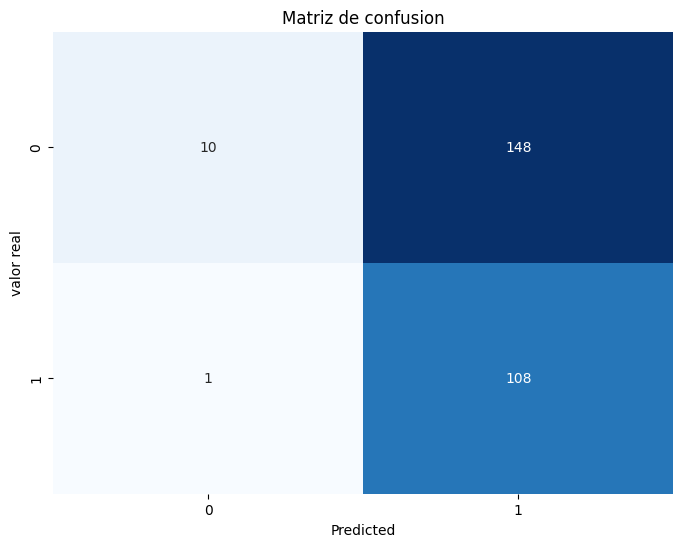

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()


### Ejemplo con dataset de iris

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [20]:
data = load_iris()

In [21]:
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
Y = data['target']
labels = list(data['target_names'])
print(labels)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


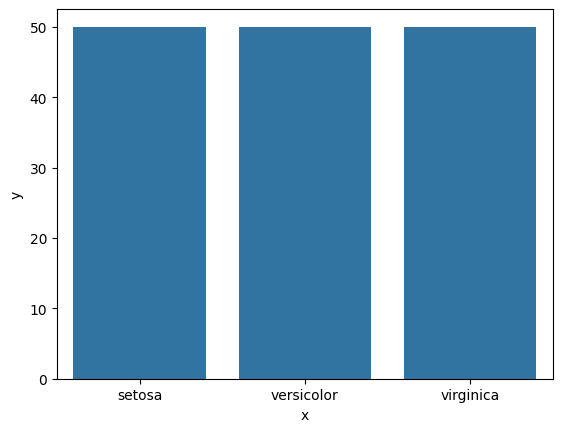

In [23]:
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
raw_data = {'x': labels, 'y': table.values}
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

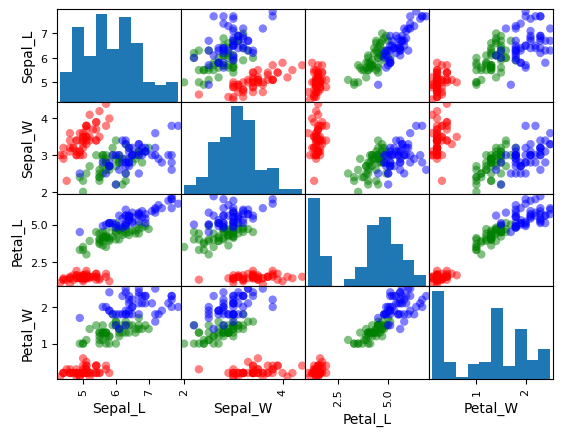

In [24]:
X_df = pd.DataFrame(X,columns=['Sepal_L','Sepal_W','Petal_L','Petal_W'])
my_cols_dict = {0:'red', 1:'green', 2:'blue'}
my_cols = pd.Series(Y).apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(X_df, c=my_cols, marker='o', alpha=0.5)
plt.show()

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [27]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred_test = GNB.predict(X_test)

In [28]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test)
print(conf_mat)

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [29]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



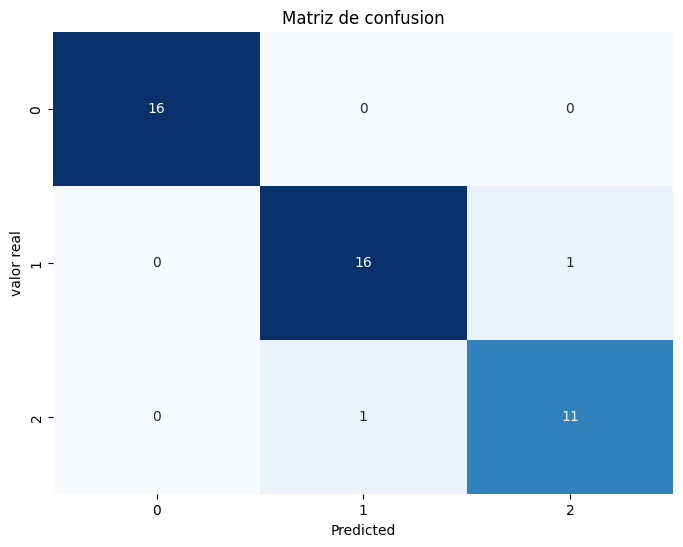

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()

In [32]:
centers = GNB.theta_
variances = GNB.var_

In [33]:
for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig=plt.figure(figsize=(4,2), dpi=100)      # Width, height and DPI setting.
    ax = fig.add_axes([0,0,1,1])                # Left, bottom, width, height.
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
        center = centers[j,i]
        sigma = np.sqrt(variances[j,i])
        ax.plot(x_grid, st.norm.pdf(x_grid,loc=center,scale=sigma),color=my_cols_dict[j],linestyle="--",label=labels[j])
    ax.legend(loc=0)
    plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

Reporte de Clasificación:
              precision    recall  f1-score   support

     no_spam       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


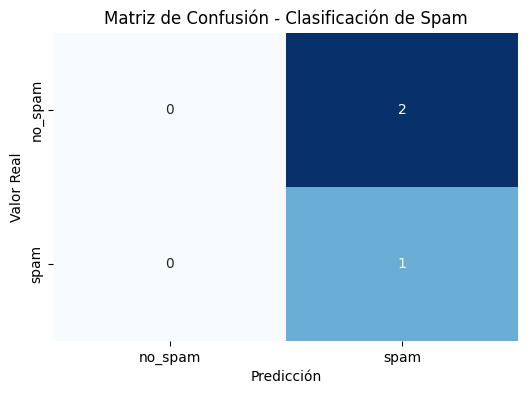


Predicciones para nuevos correos:
'Get a free prize now!' -> spam
'Let's schedule the call.' -> spam


In [31]:
# Ejemplo de clasificación de spam con Naive Bayes

# 1. Importar las bibliotecas necesarias
from sklearn.naive_bayes import MultinomialNB # MultinomialNB es adecuado para conteos (como frecuencias de palabras)
from sklearn.feature_extraction.text import CountVectorizer # Para convertir texto a vectores numéricos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Preparar los datos de ejemplo
# Creamos un conjunto de datos simple de mensajes (textos) y sus etiquetas (spam o no_spam)
messages = [
    ('Hey, check out this great offer!', 'spam'),
    ('Meeting at 3 PM tomorrow.', 'no_spam'),
    ('Click here to claim your prize!', 'spam'),
    ('Regarding your request...', 'no_spam'),
    ('You have won a lottery!', 'spam'),
    ('Project update meeting.', 'no_spam'),
    ('Limited time offer, don\'t miss out!', 'spam'),
    ('Hello, how are you?', 'no_spam'),
    ('Urgent: Your account has been compromised!', 'spam'),
    ('Follow up on our discussion.', 'no_spam')
]

df_messages = pd.DataFrame(messages, columns=['text', 'label'])

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_messages['text']
y = df_messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Convertir el texto a vectores numéricos
# CountVectorizer crea una matriz donde cada fila es un mensaje y cada columna es una palabra.
# El valor en cada celda es la frecuencia de la palabra en el mensaje.
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test) # Usamos 'transform' para el conjunto de prueba

# 5. Crear y entrenar el modelo Naive Bayes
# Usamos MultinomialNB porque estamos trabajando con conteos de palabras.
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test_counts)

# 7. Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['no_spam', 'spam'], yticklabels=['no_spam', 'spam'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Clasificación de Spam')
plt.show()

# 8. Ejemplo de predicción con nuevos datos
new_emails = ["Get a free prize now!", "Let's schedule the call."]
new_emails_counts = vectorizer.transform(new_emails)
predictions_new = model.predict(new_emails_counts)

print("\nPredicciones para nuevos correos:")
for email, prediction in zip(new_emails, predictions_new):
    print(f"'{email}' -> {prediction}")

Explicación de las diferencias de rendimiento del algoritmo Naive Bayes
El rendimiento diferente del algoritmo Gaussian Naive Bayes (GNB) en los tres casos (ejemplo simple de compra de coche, Titanic e Iris) se debe a varios factores relacionados con los datos, las suposiciones del algoritmo y la complejidad del problema. A continuación, se detalla por qué el conjunto de datos Iris obtuvo mejores resultados, en comparación con los otros.

1. Características y tamaño de los conjuntos de datos

Ejemplo simple de compra de coche:

Tamaño: Muy pequeño (10 muestras, divididas en 8 para entrenamiento y 2 para prueba).
Problema: Con tan pocos datos, el modelo puede "memorizar" patrones (sobreajuste), pero el rendimiento en la prueba es poco fiable, casi aleatorio. La precisión podría parecer alta (por ejemplo, 1.00 si ambas muestras de prueba son correctas) o baja, pero no es representativa debido a la alta varianza.
Impacto: Los datos pequeños no permiten al modelo aprender relaciones estadísticas robustas.


Conjunto de datos Titanic:

Tamaño: Más grande (~891 muestras, divididas 70/30 en ~623 para entrenamiento y ~268 para prueba).
Problema: Es desbalanceado (~38% sobrevivientes vs. 62% no sobrevivientes), tiene características mixtas (continuas como Edad/Ingresos, categóricas como Pclass/Sex si están codificadas numéricamente) y ruido del mundo real (valores faltantes, outliers). Esto lo hace un problema más difícil, con una precisión típica de 70-80% para GNB.
Impacto: La complejidad y el desbalance reducen el rendimiento.


Conjunto de datos Iris:

Tamaño: Mediano (150 muestras, balanceadas en 3 clases, divididas 70/30 en 105 para entrenamiento y 45 para prueba).
Ventaja: Es un conjunto limpio y diseñado para pruebas, con características continuas (longitud/anchura de sépalos/pétalos) que se aproximan a una distribución normal y clases bien separadas (especialmente setosa). Esto lleva a un rendimiento excelente (~95-100% de precisión).
Impacto: El tamaño suficiente, la limpieza y el balance favorecen a GNB.



Por qué Iris es mejor: Los conjuntos más grandes y balanceados permiten a GNB estimar probabilidades con mayor precisión. El ejemplo simple es demasiado pequeño, y Titanic tiene más complejidad y desbalance, lo que reduce el rendimiento.

2. Cumplimiento de las suposiciones de GNB
GNB asume que:

Las características son independientes entre sí.

Las características siguen una distribución Gaussiana (normal) dentro de cada clase.

Ejemplo simple:

Problema: Edad e ingresos están correlacionados (las personas mayores suelen tener mayores ingresos), lo que viola la suposición de independencia. Con tan pocas muestras, las distribuciones podrían no ser Gaussianas.
Impacto: Esto lleva a predicciones subóptimas, aunque la precisión parezca aceptable en un conjunto de prueba pequeño.


Titanic:

Problema: Características como Edad y Tarifa (Fare) son asimétricas (no perfectamente Gaussianas), y hay correlaciones (por ejemplo, Pclass afecta a Fare). Si las características categóricas (como Sexo o Embarcado) están codificadas como números sin un manejo adecuado (por ejemplo, codificación one-hot), esto no se alinea con GNB. Además, el ruido (valores faltantes, multicolinealidad) añade error.
Impacto: Las violaciones de las suposiciones reducen la calidad de las estimaciones de probabilidad.


Iris:

Ventaja: Las características son en su mayoría independientes y tienen distribuciones aproximadamente Gaussianas por clase. Por ejemplo, la longitud del pétalo separa bien a setosa de las otras clases.
Impacto: Este ajuste casi perfecto a las suposiciones de GNB mejora la precisión.



Por qué Iris es mejor: Iris cumple mejor con las suposiciones de GNB, mientras que los otros conjuntos tienen correlaciones y distribuciones no Gaussianas, lo que lleva a más errores de clasificación.

3. Complejidad del problema y separabilidad de clases

Ejemplo simple:

Clasificación: Binaria (comprar/no comprar), con separación lineal aproximada.
Problema: Los datos pequeños dificultan la generalización. Con solo 2 muestras de prueba, los resultados son casi aleatorios.
Impacto: La falta de datos limita el aprendizaje de patrones robustos.


Titanic:

Clasificación: Binaria, pero compleja. La supervivencia depende de factores entrelazados (género, clase, edad). Las clases tienen mucho solapamiento (muchos pasajeros similares en ambos grupos, sobrevivientes/no sobrevivientes).
Problema: Esto genera más falsos positivos/negativos en la matriz de confusión, reduciendo la precisión.
Impacto: Es un problema "ruidoso" del mundo real, más difícil para GNB.


Iris:

Clasificación: Multiclase (3 clases), pero simple. Las clases son linealmente separables en el espacio de características (especialmente usando pétalos). Setosa es completamente distinta, y versicolor/virginica tienen un solapamiento mínimo.
Impacto: Esto facilita que GNB trace límites claros, logrando alta precisión.



Por qué Iris es mejor: Iris es un conjunto "fácil", diseñado para clasificadores simples. Titanic es más complejo debido al solapamiento y factores externos; el ejemplo simple carece de datos suficientes para manejar incluso una complejidad básica.

4. Análisis de las métricas de evaluación
Basado en los informes de clasificación (classification_report) y matrices de confusión:

Ejemplo simple:

La precisión en 2 muestras de prueba es frágil (por ejemplo, podría variar entre 0.50 y 1.00). No se muestra un informe detallado, pero los resultados son poco confiables debido al tamaño.


Titanic:

Probablemente muestra precisión, recall y F1 moderados (por ejemplo, ~0.75 en promedio), con un sesgo hacia la clase mayoritaria (no sobrevivientes). La matriz de confusión tiene valores fuera de la diagonal debido al solapamiento de clases.
Impacto: El desbalance y la complejidad generan más errores.


Iris:

Alta precisión, recall y F1 (por ejemplo, 0.95+). La matriz de confusión es casi perfecta, con pocos errores (si los hay, suelen ser entre versicolor y virginica).
Impacto: La separabilidad de clases lleva a un rendimiento superior.



Por qué Iris es mejor: El rendimiento superior en Iris refleja lo bien que los datos se adaptan al modelo, no un cambio en el algoritmo en sí.

Recomendaciones para mejorar los otros casos

Para el ejemplo simple y Titanic:

Aumentar datos: Usa conjuntos más grandes para mejorar la generalización.
Preprocesamiento: Aplica transformaciones (por ejemplo, logaritmo para características asimétricas como Fare) para acercarlas a una distribución Gaussiana. Codifica variables categóricas con one-hot encoding.
Desbalance: Usa técnicas como SMOTE para equilibrar clases en Titanic.
Otros modelos NB: Prueba MultinomialNB si las características son conteos o categóricas.


General:

Verifica las suposiciones de GNB (por ejemplo, grafica distribuciones por clase con sns.histplot).
Usa validación cruzada (cross_val_score) para obtener métricas más fiables que una sola división.
Comparte las salidas exactas (precisión, informes, matrices) para un análisis más detallado.



El éxito de Iris se debe a su simplicidad, limpieza y cumplimiento de las suposiciones de GNB, mientras que los otros casos enfrentan desafíos por tamaño, ruido o violaciones de estas suposiciones.

# Algoritmo K-Nearest Neighbors (KNN)

El algoritmo **KNN** (K-vecinos más cercanos) es un método de
**aprendizaje supervisado** que se basa en la idea de que *instancias
similares tienen resultados similares*.

En lugar de construir un modelo explícito, KNN almacena todos los datos
de entrenamiento y clasifica o predice basándose en la cercanía entre
puntos.

------------------------------------------------------------------------

## Funcionamiento general

1.  Se define un valor de **k** (número de vecinos a considerar).\
2.  Para un nuevo dato:
    -   Se calcula la distancia entre el nuevo dato y todos los puntos
        del dataset (generalmente Euclídea, aunque pueden usarse
        Manhattan, Minkowski, etc.).\
    -   Se seleccionan los **k vecinos más cercanos**.\
3.  La predicción depende del tipo de problema:
    -   **Clasificación** → se toma la **clase más frecuente** entre los
        vecinos.\
    -   **Regresión** → se toma el **promedio** (o ponderado por
        distancia) de los valores de los vecinos.

------------------------------------------------------------------------

## KNN para Clasificación

Ejemplo: Clasificar si una fruta es "manzana" o "pera" en función de su
**peso** y **color**.

-   Si k = 3, se buscan los 3 puntos más cercanos.\
-   Si 2 son "manzanas" y 1 es "pera", el algoritmo predice "manzana".

Ventaja: intuitivo y fácil de usar.\
Problema: si las clases están desbalanceadas, la mayoría puede dominar
la predicción.

------------------------------------------------------------------------

## KNN para Regresión

Ejemplo: Predecir el precio de una casa en función de sus
características (tamaño, habitaciones, ubicación).

-   Si k = 4, se buscan las 4 casas más similares.\
-   El precio estimado será el **promedio de esos 4 precios**.

Se puede mejorar usando **ponderación por distancia**: los vecinos más
cercanos tienen más peso que los más lejanos.

------------------------------------------------------------------------

## Elección de k

-   Si **k es muy pequeño (ej. 1)** → el modelo es muy sensible al ruido
    (alta varianza).\
-   Si **k es muy grande** → el modelo se vuelve demasiado general (alto
    sesgo).\
-   Una buena práctica es probar varios valores de k y usar validación
    cruzada para elegir el óptimo.

------------------------------------------------------------------------

## Ventajas de KNN

-   Simple e intuitivo.\
-   No hace supuestos sobre la distribución de los datos.\
-   Funciona tanto para clasificación como para regresión.\
-   Puede capturar relaciones complejas entre datos.

------------------------------------------------------------------------

## Desventajas de KNN

-   Costoso en predicción: hay que calcular distancias con todos los
    puntos cada vez.\
-   Sensibilidad a la escala: si las variables están en diferentes
    escalas, las distancias pueden ser engañosas (se recomienda
    normalizar).\
-   Sensibilidad al ruido: puntos atípicos (outliers) pueden afectar las
    predicciones.\
-   Curse of dimensionality: en datasets con muchas variables, las
    distancias dejan de ser representativas.

------------------------------------------------------------------------

## Ejemplo en Python (Clasificación)

``` python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Dataset de flores
X, y = load_iris(return_X_y=True)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
print("Predicciones:", knn.predict(X_test))
print("Precisión:", knn.score(X_test, y_test))
```

------------------------------------------------------------------------

## Ejemplo en Python (Regresión)

``` python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Datos ficticios: tamaño de casa (m2) y precio (miles de dólares)
X = np.array([[50], [60], [100], [120], [200]])
y = np.array([150, 180, 300, 350, 600])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo KNN con k=3
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

# Predicción para una casa de 110 m2
print("Precio estimado:", knn_reg.predict([[110]]))
```

------------------------------------------------------------------------

## Resumen

-   KNN Clasificación → votación mayoritaria entre vecinos.\
-   KNN Regresión → promedio (o promedio ponderado) de valores entre
    vecinos.\
-   Es un modelo simple, flexible y no paramétrico, ideal para datasets
    pequeños y de baja dimensionalidad.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [35]:
df = pd.read_csv('data_titanic.csv', header='infer')

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [40]:
df.shape[0]

891

In [41]:
n = df.shape[0]
Age = []                                                               # A temporary list.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :
            Age.append(30)                                             # If Mr. or Mrs. in the name, then fill with 30.
        else:
            Age.append(10)                                             # Likely a child. So, fill with 10.
    else:
        Age.append(df.Age[i])
df.Age = pd.Series(Age)

In [42]:
df.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,10.0
889,26.0


In [43]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,10.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [46]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,2


In [47]:
df=df.dropna(axis=0)
df.shape

(889, 7)

In [48]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


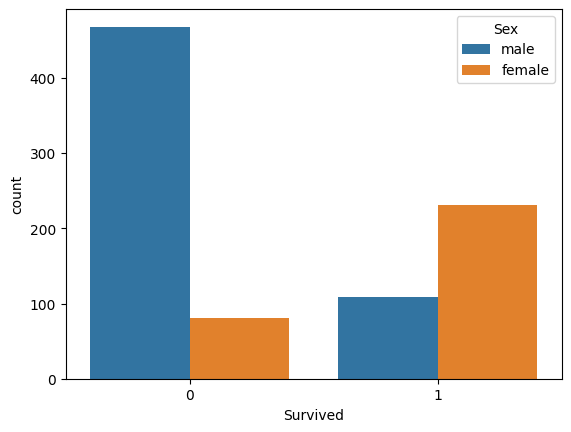

In [50]:
# The frequency table of Survived.
sns.countplot(x='Survived', hue="Sex", data=df)
plt.show()

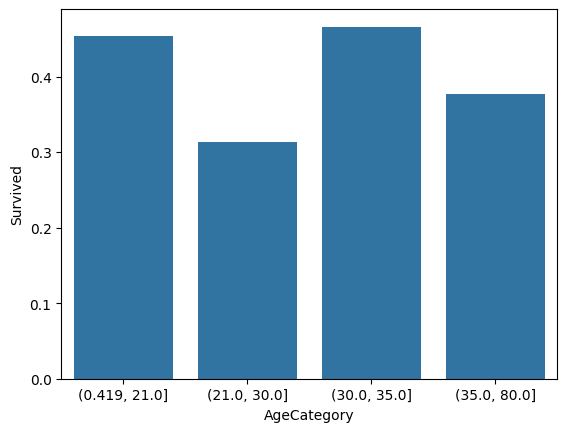

In [51]:
# Survival rate by Age category.
df['AgeCategory'] = pd.qcut(df.Age,4)                   # Using quantiles cut into 4 intervals.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df)
plt.show()

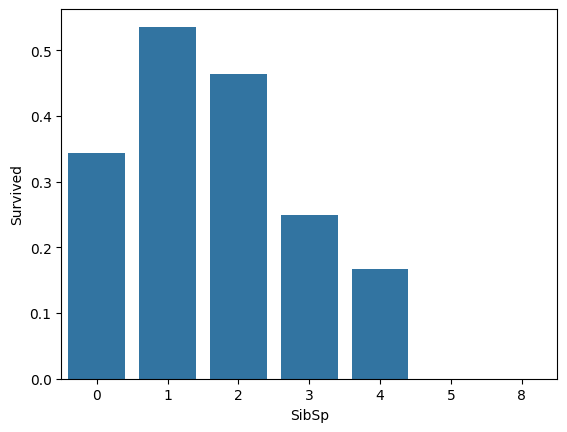

In [52]:
# Survival rate by SibSp category.
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

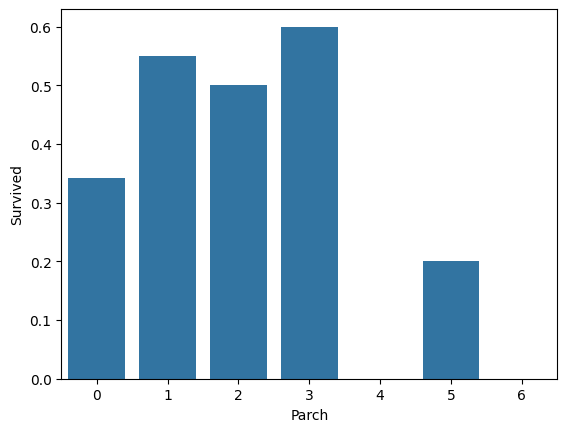

In [53]:
# Survival rate by Parch.
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

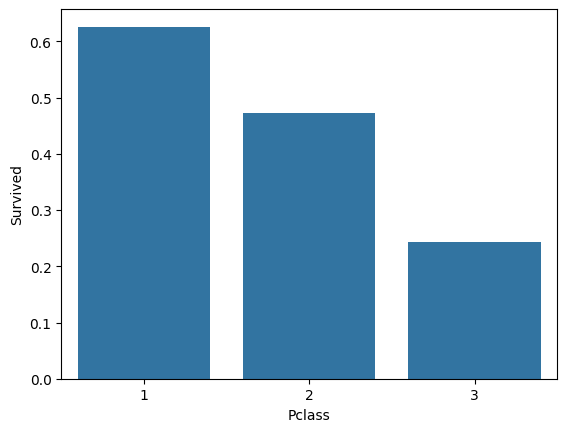

In [54]:
# Survival rate by Pclass.
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()

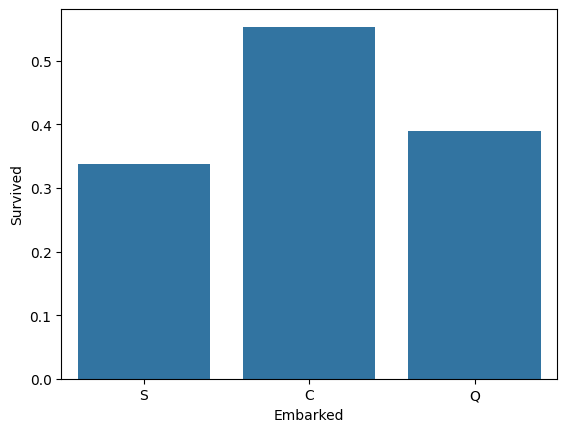

In [55]:
# Survival rate by Embarked.
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

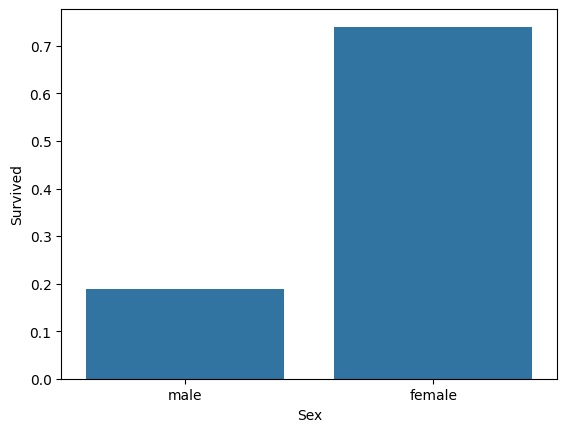

In [56]:
# Survival rate by Sex.
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

In [57]:
# Convert into dummy variables and then remove the original variables.
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))
df.head(5)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0


In [58]:
# Save to an external file.
df.to_csv('data_titanic_2.csv',index=False)

In [59]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [61]:
# KNN with n_neighbours = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, Y_train);
Y_pred = knn5.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[141  17]
 [ 42  67]]
------------------------
Accuracy : 0.779


In [62]:
# KNN with n_neighbours = 100
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train, Y_train);
Y_pred = knn100.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[[155   3]
 [ 56  53]]
------------------------
Accuracy : 0.779


In [63]:
accs = []
k_grid = range(1,100,1) # Rango entre el número dos y el 100 en pasos de 1 en 1
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accs.append(metrics.accuracy_score(Y_test,Y_pred))

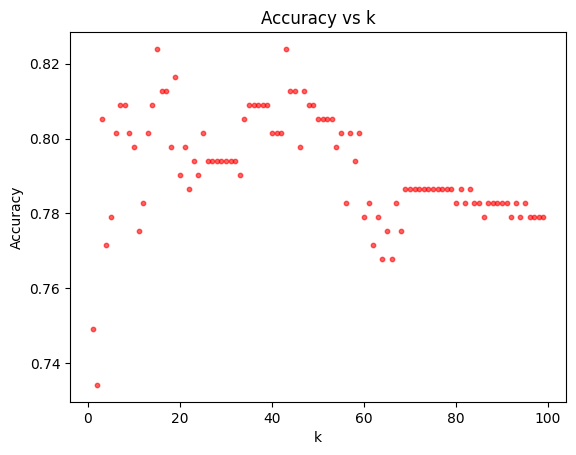

In [64]:
# Visualize.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [65]:
# Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [66]:
# Optimize the k.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1, verbose=True)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best k : 15


In [67]:
# Test with the best k.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Best Accuracy : 0.824


In [69]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       158
           1       0.90      0.64      0.75       109

    accuracy                           0.82       267
   macro avg       0.85      0.80      0.81       267
weighted avg       0.84      0.82      0.82       267



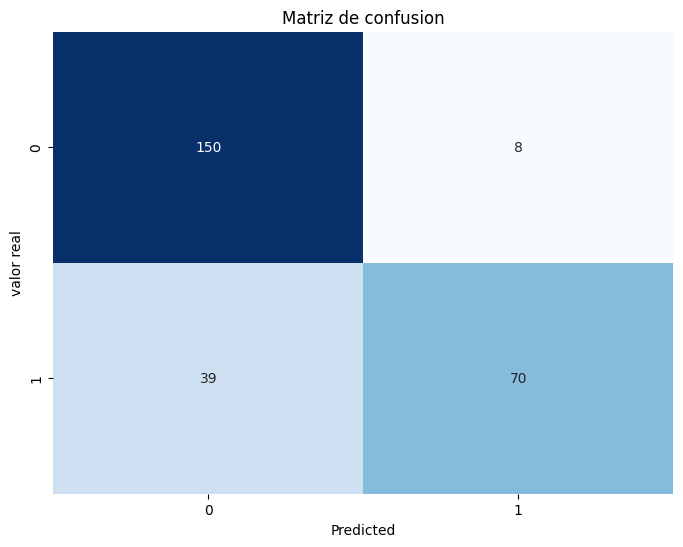

In [70]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('valor real')
plt.title('Matriz de confusion')
plt.show()

# KNeighborsClassifier en scikit-learn

## Descripción de la Función
KNeighborsClassifier es un clasificador que implementa el voto de los k vecinos más cercanos. En este algoritmo, un punto de datos se clasifica según la mayoría de votos de sus k vecinos más cercanos en el conjunto de entrenamiento. Es un método de aprendizaje supervisado no paramétrico utilizado para tareas de clasificación.

## Parámetros de Inicialización
- **n_neighbors** (tipo: int, valor por defecto: 5):  
  Número de vecinos a utilizar por defecto para las consultas de kneighbors. Representa el valor de 'k' en el algoritmo KNN, que determina cuántos puntos cercanos se consideran para la clasificación.

- **weights** (tipo: {'uniform', 'distance'}, callable o None, valor por defecto: 'uniform'):  
  Función de peso utilizada en la predicción. Posibles valores: 'uniform' para pesos uniformes (todos los vecinos tienen el mismo peso), 'distance' para pesos inversamente proporcionales a la distancia (vecinos más cercanos tienen mayor influencia), o una función callable personalizada que toma un array de distancias y devuelve un array de pesos.

- **algorithm** (tipo: {'auto', 'ball_tree', 'kd_tree', 'brute'}, valor por defecto: 'auto'):  
  Algoritmo utilizado para computar los vecinos más cercanos. 'ball_tree' utiliza BallTree, 'kd_tree' utiliza KDTree, 'brute' utiliza búsqueda de fuerza bruta, y 'auto' decide el algoritmo más apropiado basado en los valores pasados al método fit.

- **leaf_size** (tipo: int, valor por defecto: 30):  
  Tamaño de hoja pasado a BallTree o KDTree. Afecta la velocidad de construcción y consulta, así como el uso de memoria requerido para almacenar el árbol. El valor óptimo depende de la naturaleza del problema.

- **p** (tipo: float, valor por defecto: 2):  
  Parámetro de potencia para la métrica de Minkowski. Cuando p=1, se usa la distancia de Manhattan (l1); cuando p=2, se usa la distancia euclidiana (l2); para valores arbitrarios de p, se usa la distancia de Minkowski (l_p). Debe ser un valor positivo.

- **metric** (tipo: str o callable, valor por defecto: 'minkowski'):  
  Métrica utilizada para el cálculo de distancias. El valor por defecto es "minkowski", que resulta en la distancia euclidiana cuando p=2. Puede ser una función callable personalizada o "precomputed" si se proporciona una matriz de distancias.

- **metric_params** (tipo: dict, valor por defecto: None):  
  Argumentos de palabras clave adicionales para la función de métrica.

- **n_jobs** (tipo: int, valor por defecto: None):  
  Número de trabajos paralelos a ejecutar para la búsqueda de vecinos. None significa 1 (a menos que esté en un contexto de joblib.parallel_backend), y -1 significa usar todos los procesadores disponibles. No afecta el método fit.

# KNeighborsRegressor en scikit-learn

## Descripción de la Función
KNeighborsRegressor es un regresor basado en los k vecinos más cercanos. El objetivo se predice mediante interpolación local de los objetivos asociados con los vecinos más cercanos en el conjunto de entrenamiento. Es un método de aprendizaje supervisado no paramétrico utilizado para tareas de regresión.

## Parámetros de Inicialización
- **n_neighbors** (tipo: int, valor por defecto: 5):  
  Número de vecinos a utilizar por defecto para las consultas de kneighbors. Representa el valor de 'k' en el algoritmo KNN, que determina cuántos puntos cercanos se consideran para la predicción.

- **weights** (tipo: {'uniform', 'distance'}, callable o None, valor por defecto: 'uniform'):  
  Función de peso utilizada en la predicción. Posibles valores: 'uniform' para pesos uniformes (todos los vecinos tienen el mismo peso), 'distance' para pesos inversamente proporcionales a la distancia (vecinos más cercanos tienen mayor influencia), o una función callable personalizada que toma un array de distancias y devuelve un array de pesos. Por defecto, se usan pesos uniformes.

- **algorithm** (tipo: {'auto', 'ball_tree', 'kd_tree', 'brute'}, valor por defecto: 'auto'):  
  Algoritmo utilizado para computar los vecinos más cercanos. 'ball_tree' utiliza BallTree, 'kd_tree' utiliza KDTree, 'brute' utiliza búsqueda de fuerza bruta, y 'auto' decide el algoritmo más apropiado basado en los valores pasados al método fit. Nota: la entrada dispersa sobrescribe a fuerza bruta.

- **leaf_size** (tipo: int, valor por defecto: 30):  
  Tamaño de hoja pasado a BallTree o KDTree. Afecta la velocidad de construcción y consulta, así como el uso de memoria requerido para almacenar el árbol. El valor óptimo depende de la naturaleza del problema.

- **p** (tipo: float, valor por defecto: 2):  
  Parámetro de potencia para la métrica de Minkowski. Cuando p=1, se usa la distancia de Manhattan (l1); cuando p=2, se usa la distancia euclidiana (l2); para valores arbitrarios de p, se usa la distancia de Minkowski (l_p).

- **metric** (tipo: str, DistanceMetric object o callable, valor por defecto: 'minkowski'):  
  Métrica utilizada para el cálculo de distancias. El valor por defecto es "minkowski", que resulta en la distancia euclidiana cuando p=2. Puede ser una función callable personalizada o un objeto DistanceMetric.

- **metric_params** (tipo: dict, valor por defecto: None):  
  Argumentos de palabras clave adicionales para la función de métrica.

- **n_jobs** (tipo: int, valor por defecto: None):  
  Número de trabajos paralelos a ejecutar para la búsqueda de vecinos. None significa 1 (a menos que esté en un contexto de joblib.parallel_backend), y -1 significa usar todos los procesadores disponibles. No afecta el método fit.

# Ejemplos en Código

## Ejemplo de KNeighborsClassifier
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
```

## Ejemplo de KNeighborsRegressor
```python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el regresor KNN
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_regressor.predict(X_test)
print("Error cuadrático medio:", mean_squared_error(y_test, y_pred))
```

In [73]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.9777777777777777


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [76]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

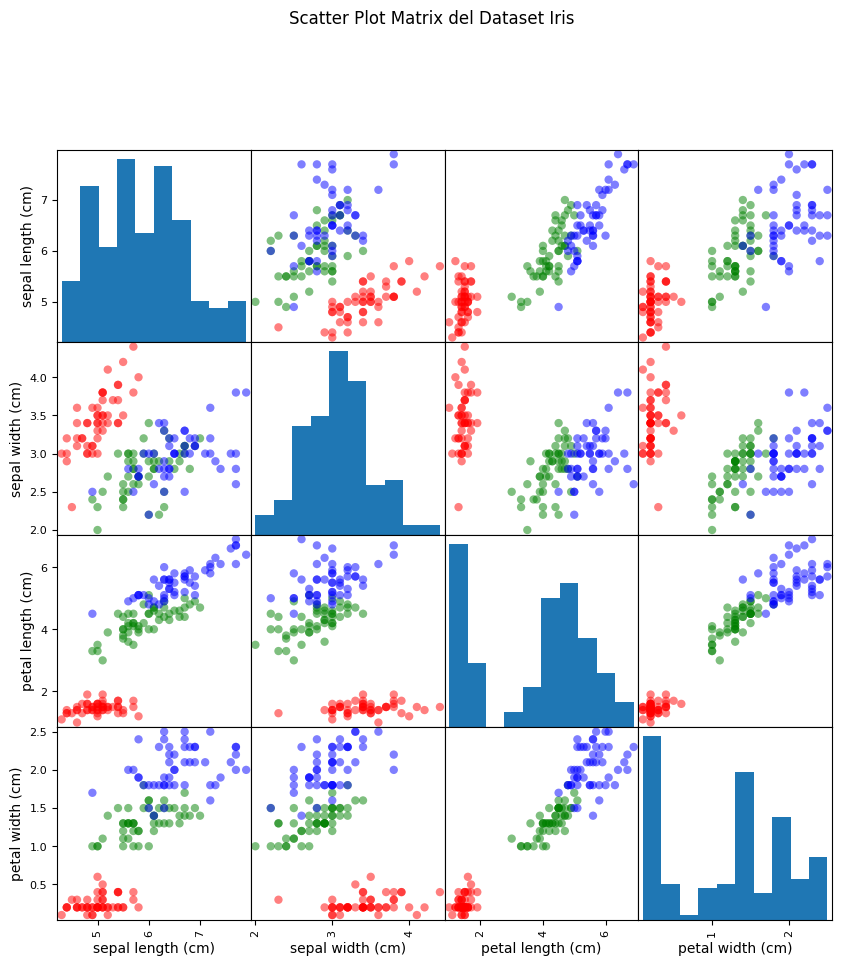

In [75]:
# Crear un DataFrame de pandas con los datos de características
X_df = pd.DataFrame(X, columns=columns)

# Asignar colores a las clases
my_cols_dict = {0: 'red', 1: 'green', 2: 'blue'}
my_cols = pd.Series(y).apply(lambda x: my_cols_dict[x])

# Generar el scatter plot matrix
pd.plotting.scatter_matrix(X_df, c=my_cols, marker='o', alpha=0.5, figsize=(10, 10))
plt.suptitle('Scatter Plot Matrix del Dataset Iris', y=1.02) # Añadir un título general
plt.show()

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (importante para métricas basadas en distancia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de métricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aquí porque Iris es un conjunto de datos numérico

for metric in metrics:
    # Crear y entrenar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_classifier.predict(X_test_scaled)
    print(f"Precisión con métrica {metric}: {accuracy_score(y_test, y_pred):.3f}")

Precisión con métrica euclidean: 1.000
Precisión con métrica manhattan: 1.000
Precisión con métrica chebyshev: 0.956
Precisión con métrica minkowski: 1.000
Precisión con métrica cosine: 0.889


# Métricas de Distancia en KNeighborsClassifier y KNeighborsRegressor

En los algoritmos **KNeighborsClassifier** y **KNeighborsRegressor** de scikit-learn, la elección de la métrica de distancia es crucial, ya que determina cómo se calcula la cercanía entre los puntos de datos. El parámetro `metric` permite especificar la métrica de distancia a utilizar. A continuación, se explican las métricas de distancia más comunes soportadas por scikit-learn para estos algoritmos, junto con una breve descripción y ejemplos prácticos.

## Métricas de Distancia Comunes

### 1. **Minkowski**
   - **Descripción**: La métrica de Minkowski es una generalización de otras métricas de distancia, definida como:
     \[
     D(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
     \]
     Donde \( p \) es el parámetro de potencia especificado por el parámetro `p`. Cuando \( p=1 \), se convierte en la distancia de Manhattan; cuando \( p=2 \), es la distancia euclidiana. Es la métrica por defecto en scikit-learn (`metric='minkowski'`).
   - **Uso**: Adecuada para datos numéricos continuos. La elección de \( p \) afecta la sensibilidad a las diferencias en las características.
   - **Ventajas**: Flexible, ya que permite ajustar \( p \) para adaptarse a diferentes tipos de datos.
   - **Desventajas**: Sensible a la escala de las características, por lo que se recomienda escalar los datos (por ejemplo, con StandardScaler).

### 2. **Euclidean (Euclidiana)**
   - **Descripción**: Es un caso especial de la métrica de Minkowski con \( p=2 \). Calcula la distancia en línea recta entre dos puntos en un espacio euclidiano:
     \[
     D(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
     \]
   - **Uso**: Ideal para datos numéricos donde las distancias geométricas son relevantes, como en problemas de clustering o clasificación espacial.
   - **Ventajas**: Intuitiva y ampliamente utilizada en espacios continuos.
   - **Desventajas**: Sensible a valores atípicos y a diferencias en la escala de las características.

### 3. **Manhattan (Cityblock o L1)**
   - **Descripción**: Es un caso especial de la métrica de Minkowski con \( p=1 \). Calcula la suma de las diferencias absolutas entre las coordenadas de dos puntos:
     \[
     D(x, y) = \sum_{i=1}^n |x_i - y_i|
     \]
   - **Uso**: Útil en datos donde las distancias se miden a lo largo de ejes ortogonales (por ejemplo, en problemas con estructuras en forma de cuadrícula, como en redes urbanas).
   - **Ventajas**: Menos sensible a valores atípicos que la distancia euclidiana.
   - **Desventajas**: Puede no capturar bien relaciones no lineales en datos complejos.

### 4. **Chebyshev**
   - **Descripción**: Calcula la distancia máxima entre las coordenadas de dos puntos:
     \[
     D(x, y) = \max_i |x_i - y_i|
     \]
   - **Uso**: Adecuada en problemas donde la mayor diferencia en cualquier dimensión es la más relevante, como en juegos o sistemas donde una sola característica dominante determina la cercanía.
   - **Ventajas**: Robusta a diferencias menores en otras dimensiones.
   - **Desventajas**: Puede ignorar información útil de otras dimensiones.

### 5. **Cosine (Coseno)**
   - **Descripción**: Mide el ángulo entre dos vectores, ignorando la magnitud. La distancia se calcula como:
     \[
     D(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
     \]
   - **Uso**: Muy utilizada en datos de alta dimensionalidad, como en procesamiento de texto o imágenes, donde la orientación de los vectores es más importante que su magnitud.
   - **Ventajas**: Insensible a la escala de los datos, ideal para datos dispersos o de texto.
   - **Desventajas**: No considera la magnitud de los vectores, lo que puede ser una limitación en algunos contextos.

### 6. **Hamming**
   - **Descripción**: Calcula la proporción de posiciones en las que dos vectores difieren. Es adecuada para datos categóricos o binarios:
     \[
     D(x, y) = \frac{\text{número de posiciones donde } x_i \neq y_i}{n}
     \]
   - **Uso**: Ideal para datos categóricos, como cadenas de texto o secuencias binarias.
   - **Ventajas**: Simple y efectiva para datos no numéricos.
   - **Desventajas**: No captura relaciones de magnitud, solo diferencias categóricas.

### 7. **Precomputed**
   - **Descripción**: Permite al usuario proporcionar una matriz de distancias precalculada en lugar de calcular las distancias internamente. El usuario debe pasar una matriz cuadrada de distancias o disimilaridades.
   - **Uso**: Útil cuando se desea utilizar una métrica personalizada o cuando las distancias ya han sido calculadas.
   - **Ventajas**: Flexibilidad para usar métricas no estándares.
   - **Desventajas**: Requiere precalcular la matriz de distancias, lo que puede ser costoso en términos de memoria y tiempo para conjuntos de datos grandes.

## Ejemplos en Código para KNeighborsClassifier y KNeighborsRegressor

### Ejemplo de KNeighborsClassifier con Diferentes Métricas
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos (importante para métricas basadas en distancia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de métricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aquí porque Iris es un conjunto de datos numérico

for metric in metrics:
    # Crear y entrenar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_classifier.predict(X_test_scaled)
    print(f"Precisión con métrica {metric}: {accuracy_score(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsRegressor con Diferentes Métricas
```python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de métricas a probar
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
# Nota: 'hamming' no se usa aquí porque Diabetes es un conjunto de datos numérico

for metric in metrics:
    # Crear y entrenar el regresor KNN
    knn_regressor = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_regressor.fit(X_train_scaled, y_train)

    # Predecir y evaluar
    y_pred = knn_regressor.predict(X_test_scaled)
    print(f"Error cuadrático medio con métrica {metric}: {mean_squared_error(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsClassifier con Métrica Hamming
La métrica Hamming es adecuada para datos categóricos. A continuación, se muestra un ejemplo con datos categóricos simulados.

```python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos categórico simulado
np.random.seed(42)
X = np.random.choice(['A', 'B', 'C'], size=(100, 5))  # 100 muestras, 5 características categóricas
y = np.random.choice([0, 1], size=100)  # Etiquetas binarias

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador KNN con métrica Hamming
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='hamming')
knn_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(X_test)
print(f"Precisión con métrica Hamming: {accuracy_score(y_test, y_pred):.3f}")
```

### Ejemplo de KNeighborsClassifier con Métrica Precomputada
Para la métrica `precomputed`, se debe proporcionar una matriz de distancias personalizada.

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular matrices de distancias precomputadas (usando distancia euclidiana como ejemplo)
train_dist = cdist(X_train, X_train, metric='euclidean')
test_dist = cdist(X_test, X_train, metric='euclidean')

# Crear y entrenar el clasificador KNN con métrica precomputada
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='precomputed')
knn_classifier.fit(train_dist, y_train)

# Predecir y evaluar
y_pred = knn_classifier.predict(test_dist)
print(f"Precisión con métrica precomputada: {accuracy_score(y_test, y_pred):.3f}")
```

## Notas Adicionales
- **Escalado de Datos**: Las métricas basadas en distancia (como Euclidean, Manhattan, Minkowski, Chebyshev) son sensibles a la escala de las características. Por lo tanto, es fundamental escalar los datos antes de usar estas métricas (por ejemplo, con `StandardScaler`).
- **Métricas Personalizadas**: Además de las métricas predefinidas, puedes definir una función de distancia personalizada y pasarla al parámetro `metric`. La función debe tomar dos arrays y devolver un valor de distancia.
- **Hamming y Datos Categóricos**: La métrica Hamming requiere que los datos sean categóricos o binarios. Si los datos son numéricos, considera convertirlos a categorías o usar otra métrica.
- **Precomputed y Memoria**: La métrica `precomputed` puede ser costosa en términos de memoria para conjuntos de datos grandes, ya que requiere almacenar matrices de distancias completas.

# Trabajo en equipos


-  GRUPO 1 : 7.1 (SLIDES 362 a 376 ) → https://drive.google.com/file/d/16eUF8AvhOmDa7khZAD6IcGtDHH0GI31o/view?usp=drive_link

-  GRUPO 2 : 8.1 (SLIDES 377 a 387 ) → https://drive.google.com/file/d/16od_gRlB4E8H082jH5lqVhsTfzQhxtoZ/view?usp=drive_link

-  GRUPO 3 : 8.2 (SLIDES 388 a 400 ) → https://drive.google.com/file/d/17Ix6Z4hR0olNVQCirNVs__47uWL3oleW/view?usp=drive_link

-  GRUPO 4 : 8.3 (SLIDES 401 a 430 ) → https://drive.google.com/file/d/17DzZyGOJeiLvJ5Y0s7LBpHsWRHCGCdRk/view?usp=drive_link
